In [9]:
!ls data/transit_lines

cities.csv        station_lines.csv systems.csv       tracks.csv
lines.csv         stations.csv      track_lines.csv


In [5]:
!head data/transit_lines

head: Error reading data/transit_lines


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

In [32]:
transit_2 = os.listdir('data/transit_lines') #outputs list of units, needs full directory path

transit = ['data/transit_lines/cities.csv', 'data/transit_lines/lines.csv', 
           'data/transit_lines/station_lines.csv', 'data/transit_lines/stations.csv', 
           'data/transit_lines/systems.csv', 'data/transit_lines/track_lines.csv', 
           'data/transit_lines/tracks.csv']
cities, lines, station_lines, stations, systems, track_lines, tracks = [pd.read_csv(i) for i in transit]
# lines = pd.read_csv('data/transit_lines/lines.csv')
# station_lines.csv = pd.read_csv('data/transit_lines/statlines.csv')
display(cities.head(),lines.head(), station_lines.head(), stations.head(), systems.head(), track_lines.head(), tracks.head())

,id,name,coords,start_year,url_name,country,country_state
0,5,Aberdeen,POINT(-2.15 57.15),2017.0,aberdeen,Scotland,NaN
1,6,Adelaide,POINT(138.6 -34.91666667),2017.0,adelaide,Australia,NaN
2,7,Algiers,POINT(3 36.83333333),2017.0,algiers,Algeria,NaN
3,9,Ankara,POINT(32.91666667 39.91666667),2017.0,ankara,Turkey,NaN
4,16,Belém,POINT(-48.48333333 -1.466666667),2017.0,belem,Brazil,NaN


,id,city_id,name,url_name,color,system_id,transport_mode_id
0,43,4,Línea 2,43-linea-2,#ffbe2e,267,4.0
1,75,34,Línea 3 Metro de Caracas,75-linea-3-metro-de-caracas,#000,119,NaN
2,107,126,Línea 1,107-linea-1,#434343,249,NaN
3,604,74,La navette,604-la-navette,#009ab9,346,NaN
4,61,66,Línea 1 (Tramo 1A),61-linea-1,#49aa43,250,NaN


,id,station_id,line_id,city_id,created_at,updated_at
0,47,7754,570,74,2017-11-21 00:00:00,2017-11-21 00:00:00
1,48,7771,571,74,2017-11-21 00:00:00,2017-11-21 00:00:00
2,49,7764,571,74,2017-11-21 00:00:00,2017-11-21 00:00:00
3,50,7763,571,74,2017-11-21 00:00:00,2017-11-21 00:00:00
4,51,7729,571,74,2017-11-21 00:00:00,2017-11-21 00:00:00


,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74


,id,city_id,name
0,1,5,NaN
1,2,6,NaN
2,3,7,NaN
3,4,8,NaN
4,5,9,NaN


,id,section_id,line_id,created_at,updated_at,city_id
0,2494,1278,343,2017-11-21 00:00:00,2017-11-21 00:00:00,252
1,4124,4477,779,2017-11-21 00:09:55.135507,2017-11-21 00:09:55.135507,63
2,2495,21,9,2017-11-21 00:00:00,2017-11-21 00:00:00,1
3,2496,940,228,2017-11-21 00:00:00,2017-11-21 00:00:00,79
4,4129,4478,793,2017-11-21 17:44:39.765832,2017-11-21 17:44:39.765832,48


,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118


In [38]:
# transit_1 = [x.replace('.csv', '') for x in transit_2]

transit_1

['tracks',
 'track_lines',
 'systems',
 'station_lines',
 'cities',
 'stations',
 'lines']

In [52]:
display(tracks.shape, lines.shape, systems.shape, station_lines.shape, cities.shape, stations.shape, lines.shape)

(9271, 7)

(1343, 7)

(488, 3)

(16242, 6)

(334, 7)

(15794, 7)

(1343, 7)

In [50]:
cities.info(), cities.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
id               334 non-null int64
name             334 non-null object
coords           334 non-null object
start_year       331 non-null float64
url_name         334 non-null object
country          334 non-null object
country_state    134 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 18.3+ KB


(None,                id   start_year
 count  334.000000   331.000000
 mean   169.505988  1998.003021
 std     96.592850    46.642905
 min      1.000000  1806.000000
 25%     86.250000  2017.000000
 50%    169.500000  2017.000000
 75%    252.750000  2017.000000
 max    338.000000  2018.000000)

In [51]:
lines.info(), lines.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 7 columns):
id                   1343 non-null int64
city_id              1343 non-null int64
name                 1343 non-null object
url_name             1343 non-null object
color                1343 non-null object
system_id            1343 non-null int64
transport_mode_id    926 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 73.5+ KB


(None,                 id      city_id    system_id  transport_mode_id
 count  1343.000000  1343.000000  1343.000000         926.000000
 mean    772.098287   118.013403   308.498883           4.434125
 std     442.513586    76.520941   136.091913           1.373684
 min       5.000000     1.000000     4.000000           0.000000
 25%     389.500000    77.000000   251.000000           4.000000
 50%     760.000000   106.000000   310.000000           4.000000
 75%    1136.500000   124.000000   380.000000           5.000000
 max    1614.000000   331.000000   634.000000           9.000000)

In [47]:
print(systems.info(), systems.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 3 columns):
id         488 non-null int64
city_id    488 non-null int64
name       287 non-null object
dtypes: int64(2), object(1)
memory usage: 11.5+ KB
None                id     city_id
count  488.000000  488.000000
mean   262.516393  139.387295
std    165.271551   83.025414
min      1.000000    1.000000
25%    124.750000   82.000000
50%    247.500000  114.000000
75%    379.250000  206.000000
max    638.000000  331.000000


In [49]:
station_lines.info(), systems.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Data columns (total 6 columns):
id            16242 non-null int64
station_id    16242 non-null int64
line_id       16242 non-null int64
city_id       16242 non-null int64
created_at    16242 non-null object
updated_at    16242 non-null object
dtypes: int64(4), object(2)
memory usage: 761.4+ KB


(None,                id     city_id
 count  488.000000  488.000000
 mean   262.516393  139.387295
 std    165.271551   83.025414
 min      1.000000    1.000000
 25%    124.750000   82.000000
 50%    247.500000  114.000000
 75%    379.250000  206.000000
 max    638.000000  331.000000)

In [53]:
tracks.info(), tracks.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
id            9271 non-null int64
geometry      9271 non-null object
buildstart    7663 non-null float64
opening       9250 non-null float64
closure       9240 non-null float64
length        9271 non-null int64
city_id       9271 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 507.1+ KB


(None,                  id     buildstart        opening       closure  \
 count   9271.000000    7663.000000    9250.000000  9.240000e+03   
 mean    5294.104951    2077.596111    2766.356432  1.024591e+06   
 std     3057.661058   30192.797253   37439.161179  1.039774e+07   
 min        1.000000      -1.000000       0.000000  1.882000e+03   
 25%     2696.500000       0.000000       0.000000  9.999990e+05   
 50%     5206.000000    1902.000000    1930.000000  9.999990e+05   
 75%     7982.500000    1987.000000    2002.000000  9.999990e+05   
 max    10534.000000  999999.000000  999999.000000  1.000000e+09   
 
               length      city_id  
 count    9271.000000  9271.000000  
 mean     2666.407939   151.605113  
 std      6396.818909    98.769444  
 min         0.000000     1.000000  
 25%       118.000000    74.000000  
 50%       578.000000   114.000000  
 75%      2182.000000   265.000000  
 max    148768.000000   331.000000  )

In [54]:
track_lines.info(), track_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9757 entries, 0 to 9756
Data columns (total 6 columns):
id            9757 non-null int64
section_id    9757 non-null int64
line_id       9757 non-null int64
created_at    9757 non-null object
updated_at    9757 non-null object
city_id       9757 non-null int64
dtypes: int64(4), object(2)
memory usage: 457.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9757 entries, 0 to 9756
Data columns (total 6 columns):
id            9757 non-null int64
section_id    9757 non-null int64
line_id       9757 non-null int64
created_at    9757 non-null object
updated_at    9757 non-null object
city_id       9757 non-null int64
dtypes: int64(4), object(2)
memory usage: 457.4+ KB


(None, None)

In [83]:
station_lines['created_at'] = pd.to_datetime(station_lines['created_at'])
station_lines['updated_at'] = pd.to_datetime(station_lines['updated_at'])
# station_lines = station_lines.drop(columns = 'datetime_create', axis = 0)

station_lines['diff'] = station_lines.updated_at - station_lines.created_at
station_lines.describe()

,id,station_id,line_id,city_id,diff
count,16242.000000,16242.000000,16242.000000,16242.000000,16242
mean,8331.670422,8358.940894,710.963982,125.790050,0 days 00:00:00
std,4837.612933,4736.682016,454.740367,81.273339,0 days 00:00:00
min,1.000000,1.000000,5.000000,1.000000,0 days 00:00:00
25%,4139.250000,4273.250000,317.000000,79.000000,0 days 00:00:00
50%,8270.500000,8514.500000,631.000000,110.000000,0 days 00:00:00
75%,12544.750000,12522.750000,1180.000000,139.000000,0 days 00:00:00
max,16794.000000,16558.000000,1614.000000,331.000000,0 days 00:00:00


In [125]:
st_1 = stations.loc[stations['closure'] < 9999]
st_1 = st_1.loc[st_1['opening'] < 9999]
st_1 = st_1.loc[st_1['buildstart'] > 0]

st_1['buildtime'] = st_1['opening'] - st_1['buildstart']
st_1['lifetime'] = st_1['closure'] - st_1['opening']

st_1[st_1['buildtime'] > 0]
st_lifetime = st_1[['id', 'geometry', 'opening', 'closure', 'lifetime']]



<Figure size 1440x576 with 0 Axes>

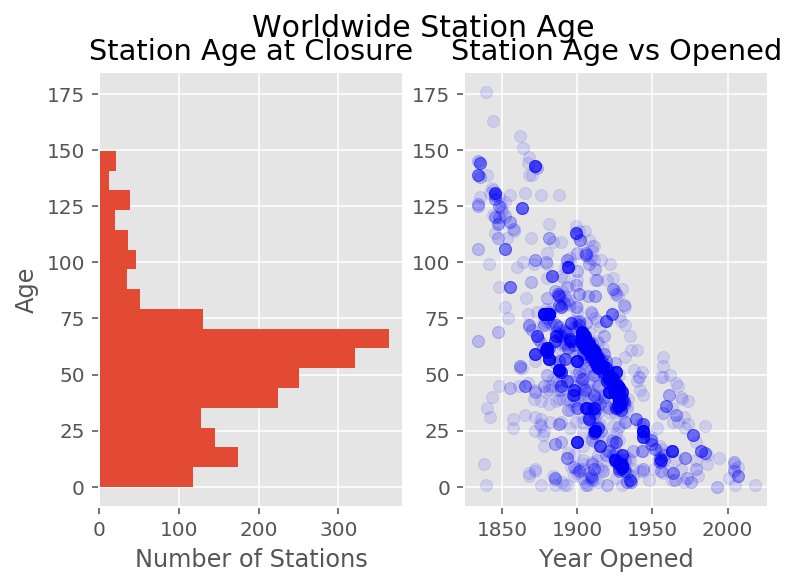

In [255]:
st_lifetime = st_lifetime[['id', 'long', 'lat', 'opening', 'closure', 'lifetime']]

plt.figure(figsize = (20,8))
fig, axs = plt.subplots(1,2)
axs[0].hist(st_lifetime['lifetime'], bins = 20, orientation = 'horizontal')
axs[0].set_title("Station Age at Closure")
axs[0].set_ylabel("Age")
axs[0].set_xlabel("Number of Stations")
axs[1].scatter(st_lifetime['opening'], st_lifetime['lifetime'], color = 'blue', alpha = 0.1)
axs[1].set_title("Station Age vs Opened")
axs[1].set_xlabel("Year Opened")
fig.suptitle('Worldwide Station Age', fontsize = 15)
# fig.tight_layout()
plt.savefig('png/worldwide_station_age.png')

In [247]:
st_lifetime.describe()

,id,opening,closure,lifetime
count,2123.000000,2123.000000,2123.000000,2123.000000
mean,10261.004239,1908.323599,1961.260480,52.936882
std,3505.869341,27.599487,23.366572,29.762724
min,85.000000,1834.000000,1840.000000,0.000000
25%,8285.500000,1893.000000,1944.000000,35.000000
50%,10822.000000,1908.000000,1968.000000,54.000000
75%,12913.500000,1925.000000,1972.000000,66.000000
max,16558.000000,2018.000000,2021.000000,176.000000


In [128]:
st_lifetime['long']=st_lifetime['geometry'].apply(lambda x: x.split('POINT(')[1].split(' ')[0])
st_lifetime['lat']= st_lifetime['geometry'].apply(lambda x: x.split('POINT(')[1].split(' ')[1].split(')')[0])

/Users/ilya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [188]:
id_country = pd.DataFrame({'city_id': cities.id, 'country': cities.country, 'name': cities.name})
station_id = stations.merge(id_country, on = 'city_id')

# station_id
station_id = station_id[['id', 'city_id', 'country', 'name_y']]

st_lifetime = st_lifetime.merge(station_id, on = 'id')

grouped = st_lifetime[['opening', 'lifetime', 'name_y']].groupby('name_y')

In [189]:
grouped.describe()
# for i, j in grouped:
#     print(i[0], '\n', i[1], type(i))
#     print(j, type(j))

opening                                                   \
               count         mean        std     min      25%     50%   
name_y                                                                  
Bilbao           1.0  2004.000000        NaN  2004.0  2004.00  2004.0   
Bordeaux         1.0  2007.000000        NaN  2007.0  2007.00  2007.0   
Boston         158.0  1874.215190  37.315379  1834.0  1845.00  1855.0   
Buenos Aires   108.0  1903.574074  32.178301  1857.0  1883.00  1894.0   
Chicago         15.0  1892.400000   0.507093  1892.0  1892.00  1892.0   
Concepción       1.0  2001.000000        NaN  2001.0  2001.00  2001.0   
Graz            45.0  1920.600000  20.400980  1898.0  1898.00  1911.0   
Lisbon           9.0  1963.222222   4.630815  1959.0  1959.00  1963.0   
London          39.0  1879.051282  31.658497  1838.0  1868.00  1872.0   
Lyons            1.0  1891.000000        NaN  1891.0  1891.00  1891.0   
Madrid          18.0  1964.500000  19.602671  1919.0  1961.00  1964.0   
Marseilles       1.0  1880.000000        NaN  1880.0  1880.00  1880.0   
Milan            7.0  1974.142857  53.760049  1870.0  1966.50  2004.0   
Nantes           7.0  1972.714286  41.990929  1879.0  1985.00  1985.0   
New York       420.0  1889.011905  16.940084  1842.0  1880.00  1885.0   
Osaka           55.0  1911.890909  21.107022  1876.0  1896.50  1910.0   
Paris           19.0  1922.947368  28.525766  1900.0  1906.50  1909.0   
Rennes           7.0  1898.428571   3.779645  1897.0  1897.00  1897.0   
Rome             3.0  1933.333333  10.066446  1924.0  1928.00  1932.0   
Santiago        30.0  1890.766667  19.563660  1863.0  1870.50  1895.0   
São Paulo        1.0  1867.000000        NaN  1867.0  1867.00  1867.0   
Tokyo         1137.0  1918.722076  16.296660  1872.0  1906.00  1915.0   
Toronto          6.0  1967.333333   8.981462  1954.0  1963.75  1966.5   
Valparaíso      34.0  1911.088235   8.536438  1899.0  1906.00  1908.0   

                              lifetime                                        \
                  75%     max    count        mean        std    min     25%   
name_y                                                                         
Bilbao        2004.00  2004.0      1.0    8.000000        NaN    8.0    8.00   
Bordeaux      2007.00  2007.0      1.0    9.000000        NaN    9.0    9.00   
Boston        1900.00  1979.0    158.0   88.696203  40.324592    2.0   66.00   
Buenos Aires  1914.50  2018.0    108.0   66.157407  31.977259    1.0   45.00   
Chicago       1893.00  1893.0     15.0   69.000000  26.403463    1.0   57.00   
Concepción    2001.00  2001.0      1.0    4.000000        NaN    4.0    4.00   
Graz          1935.00  1957.0     45.0   29.400000  21.126674    2.0    8.00   
Lisbon        1966.00  1972.0      9.0   33.444444   3.358240   26.0   32.00   
London        1884.00  1994.0     39.0   98.743590  52.139851    1.0   52.50   
Lyons         1891.00  1891.0      1.0   81.000000        NaN   81.0   81.00   
Madrid        1982.00  1986.0     18.0   18.388889  13.895149    6.0    7.75   
Marseilles    1880.00  1880.0      1.0  104.000000        NaN  104.0  104.00   
Milan         2004.00  2004.0      7.0   37.000000  51.078371    7.0    8.50   
Nantes        1985.00  2005.0      7.0   23.714286  25.091262    1.0   15.00   
New York      1896.25  1942.0    420.0   58.338095  23.462354    1.0   47.00   
Osaka         1920.00  1971.0     55.0   39.727273  28.220989    1.0   10.50   
Paris         1937.00  1993.0     19.0   20.000000  19.035055    0.0    4.00   
Rennes        1897.00  1907.0      7.0   39.571429   3.779645   31.0   41.00   
Rome          1938.00  1944.0      3.0   28.333333  26.501572    7.0   13.50   
Santiago      1903.00  1943.0     30.0   68.600000  38.183405   13.0   47.25   
São Paulo     1867.00  1867.0      1.0  144.000000        NaN  144.0  144.00   
Tokyo         1928.00  1986.0   1137.0   45.466139  20.875911    1.0   34.00   
Toronto       1972.25  1980.0      6.0   

In [200]:
top10 = ['Tokyo', 'Osaka', 'New York', 'Paris', 'Buenos Aires', 'Mexico City', 'Santiago', 'Madrid', 'London', 'Nantes']

10
Buenos Aires 0
London 1
Madrid 2
Nantes 3
New York 4
Osaka 5
Paris 6
Santiago 7
Tokyo 8


<Figure size 7920x3600 with 0 Axes>

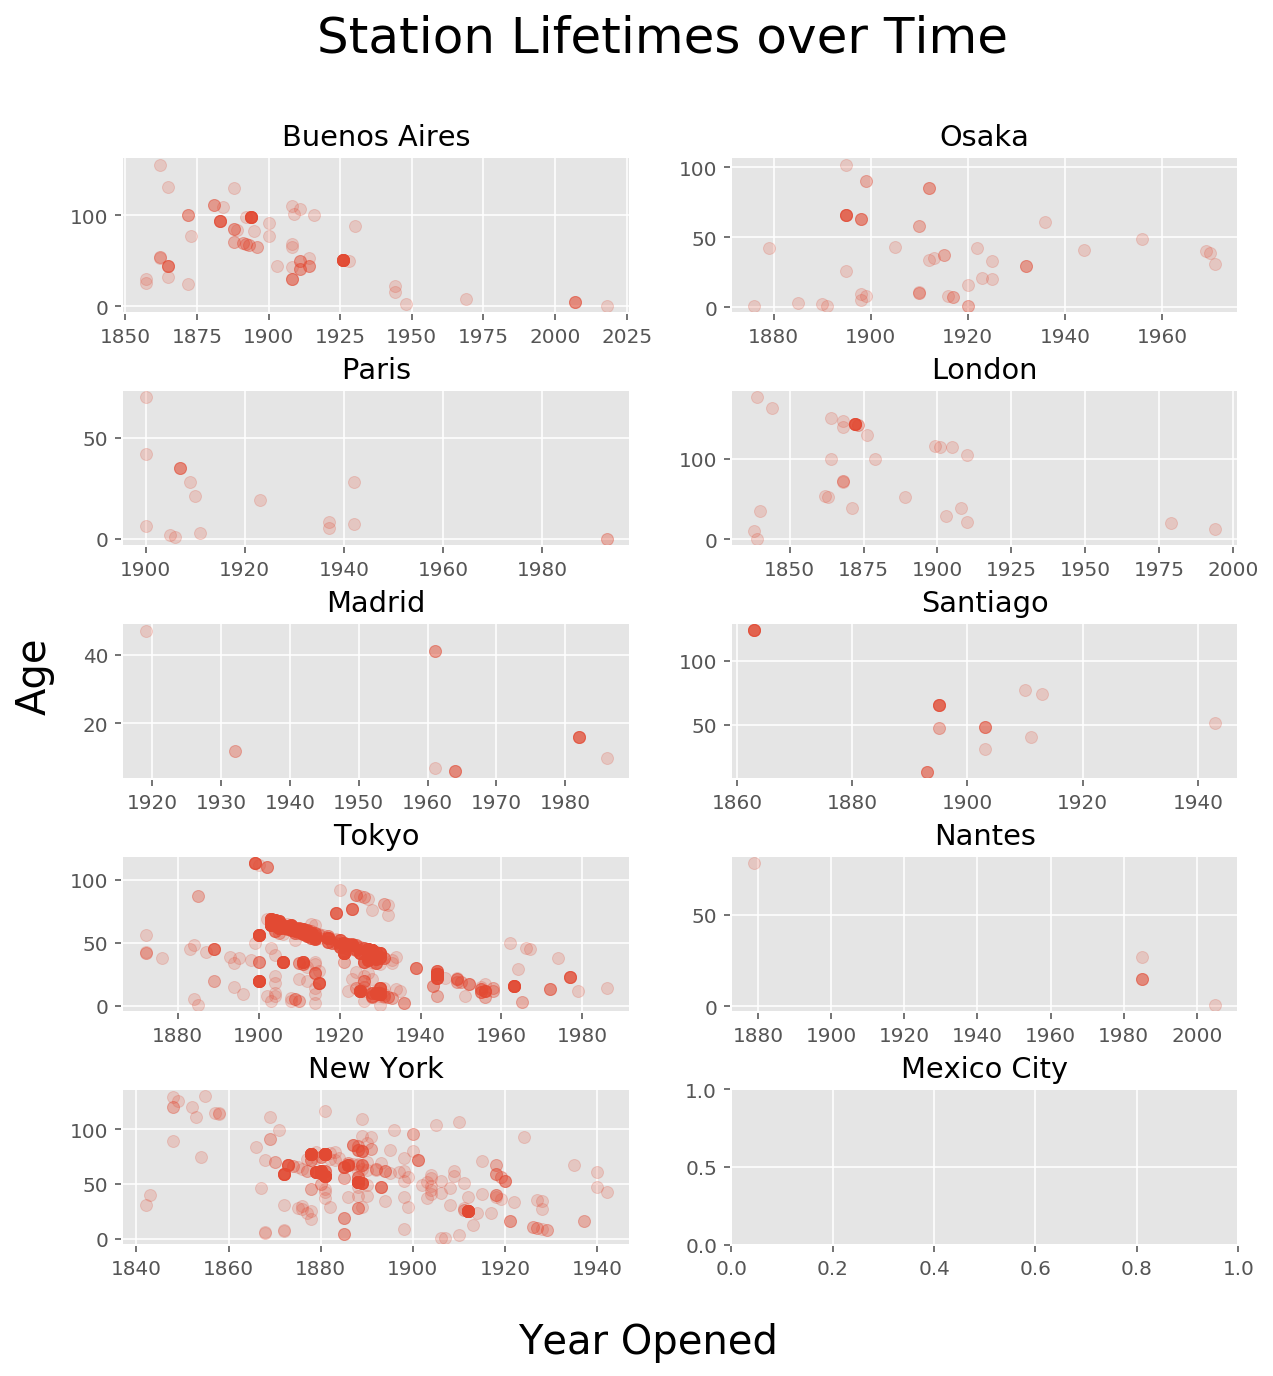

In [249]:
print(len(top10))
plt.figure(figsize=(110, 50))

# colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'gray', 'white', 'crimson', 'black']
idx, row, col = 0,5,2

fig, axs = plt.subplots(row,col)
# axs[0].hist(st_lifetime['lifetime'], bins = 20, orientation = 'horizontal')
# axs[0].set_title("Station Age at Closure")
# axs[0].set_ylabel("Age")
# axs[0].set_xlabel("Number of Stations")
# axs[1].scatter(st_lifetime['opening'], st_lifetime['lifetime'], color = 'blue', alpha = 0.1)
# axs[1].set_title("Station Age vs Opened")
# axs[1].set_xlabel("Year Opened")
fig.suptitle("Station Lifetimes over Time", fontsize = 25)
fig.text(0.4, 0.05,"Year Opened", fontsize = 20)
fig.text(0.05, 0.5, "Age", rotation = 'vertical', fontsize =20)
for ctry, data in grouped:
#     print(ctry, data)
    if ctry in top10:
        print(ctry, idx)
        axs[idx%row, idx%col].scatter(data['opening'], data['lifetime'], alpha = 0.2)
        axs[idx%row, idx%col].set_title(f"{ctry}")
#         axs[idx%row, idx%col].set_xlabel("Year Opened")
#         axs[idx%row, idx%col].set_ylabel("Age")
        idx+=1
        fig.set_size_inches(10,10)
# fig.tight_layout()
axs[4,1].set_title("Mexico City")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.savefig('png/city_station_age.png')